In [46]:
import tensorflow as tf
import numpy as np

In [3]:
# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [4]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [5]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3556897 ]
 [0.49260497]
 [0.61480206]
 [0.71949244]
 [0.80600584]
 [0.8751545 ]]


In [7]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.92856807]]
[[0.20918939]]


In [8]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.57782846]
 [0.         0.06927981]
 [0.         0.24218327]
 [0.         0.95859191]
 [0.         0.90753018]
 [0.         0.67973782]
 [0.         0.98894957]
 [0.         0.15830201]
 [0.         0.47791069]
 [0.         0.83229434]
 [0.         0.49483914]
 [0.         0.30377009]
 [0.         0.63117398]
 [0.         0.72439188]
 [0.         0.86075122]
 [0.         0.35100617]
 [0.         0.91704571]
 [0.         0.48874659]
 [0.         0.07207691]
 [0.         0.84446778]
 [0.         0.07199783]
 [0.         0.76520103]
 [0.         0.57682067]
 [0.         0.5553233 ]
 [1.         0.87098905]
 [0.         0.78312747]
 [0.         0.1790017 ]
 [0.         0.31255667]
 [0.         0.10707913]
 [1.         0.43821367]
 [0.         0.57969402]
 [0.         0.28658349]
 [0.         0.98837234]
 [0.         0.50533892]
 [0.         0.08686632]
 [0.         0.82858727]
 [0.         0.7056291 ]
 [0.         0.04052008]
 [0.         0.47327185]
 [0.         0.21516657]


In [9]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.0630 - val_loss: 0.0421
Epoch 2/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0473 - val_loss: 0.0415
Epoch 3/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0471 - val_loss: 0.0439
Epoch 4/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0474 - val_loss: 0.0427
Epoch 5/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0469 - val_loss: 0.0626
Epoch 6/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0490 - val_loss: 0.0417
Epoch 7/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0467 - val_loss: 0.0438
Epoch 8/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0465 - val_loss: 0.0445
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0479 - val_loss: 0.0437
Epoch 1

Epoch 78/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0352 - val_loss: 0.0518
Epoch 79/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0343 - val_loss: 0.0480
Epoch 80/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0337 - val_loss: 0.0506
Epoch 81/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0347 - val_loss: 0.0480
Epoch 82/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0331 - val_loss: 0.0515
Epoch 83/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0331 - val_loss: 0.0538
Epoch 84/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0334 - val_loss: 0.0528
Epoch 85/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0328 - val_loss: 0.0489
Epoch 86/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0328 - val_loss: 0.0509
Epoch 87/100
1792/2048 [======================

In [ ]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

In [ ]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

In [ ]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

In [ ]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

In [ ]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

In [34]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [35]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [36]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [37]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


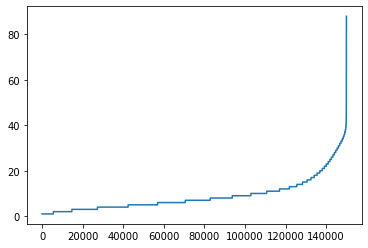

142587


In [38]:
# 7.23 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [39]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [40]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [41]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [42]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=3, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/3
120000/120000 [==============================] - 520s 4ms/sample - loss: 0.4344 - accuracy: 0.7839 - val_loss: 0.3767 - val_accuracy: 0.8215
Epoch 2/3
120000/120000 [==============================] - 514s 4ms/sample - loss: 0.3238 - accuracy: 0.8478 - val_loss: 0.3926 - val_accuracy: 0.8187
Epoch 3/3
 60032/120000 [==============>...............] - ETA: 3:58 - loss: 0.2638 - accuracy: 0.8741

In [ ]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
# 7.31 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

In [44]:
# 7.32 조선왕조실록 데이터 파일 다운로드
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

62013440/62012502 [==============================] - 6s 0us/step


In [45]:
# 7.33 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print()

# 처음 100 자를 확인해봅니다.
print(train_text[:100])

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [47]:
# 7.34 훈련 데이터 입력 정제
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [48]:
# 7.35 단어 토큰화
# 단어의 set을 만듭니다.
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for word,_ in zip(word2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(word), word2idx[word]))
print('  ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332640 unique words
{
  '\n':   0,
  '!' :   1,
  ',' :   2,
  '000명으로':   3,
  '001':   4,
  '002':   5,
  '003':   6,
  '004':   7,
  '005':   8,
  '006':   9,
  ...
}
index of UNK: 332639


In [49]:
# 7.36 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [50]:
# 7.37 기본 데이터셋 만들기
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [51]:
# 7.38 학습 데이터셋 만들기
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [52]:
# 7.39 데이터셋 shuffle, batch 설정
BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [53]:
# 7.40 단어 단위 생성 모델 정의
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 100)           33264000  
_________________________________________________________________
lstm_4 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.41 단어 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Train for 533 steps
Epoch 1/50


In [ ]:
# 7.42 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)